In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

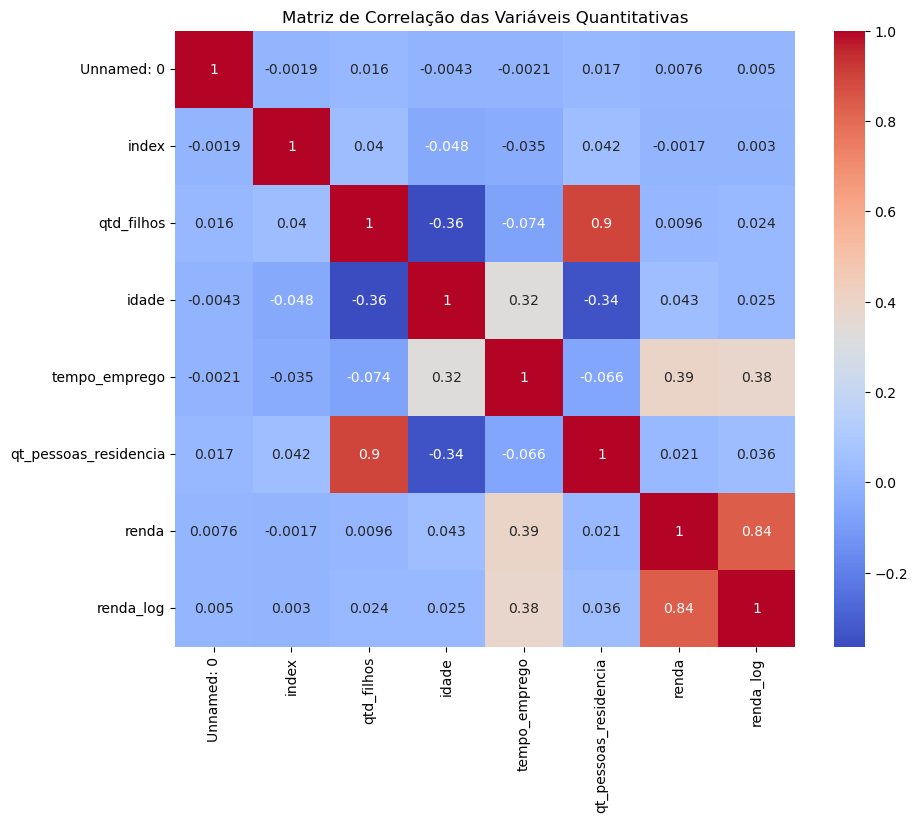

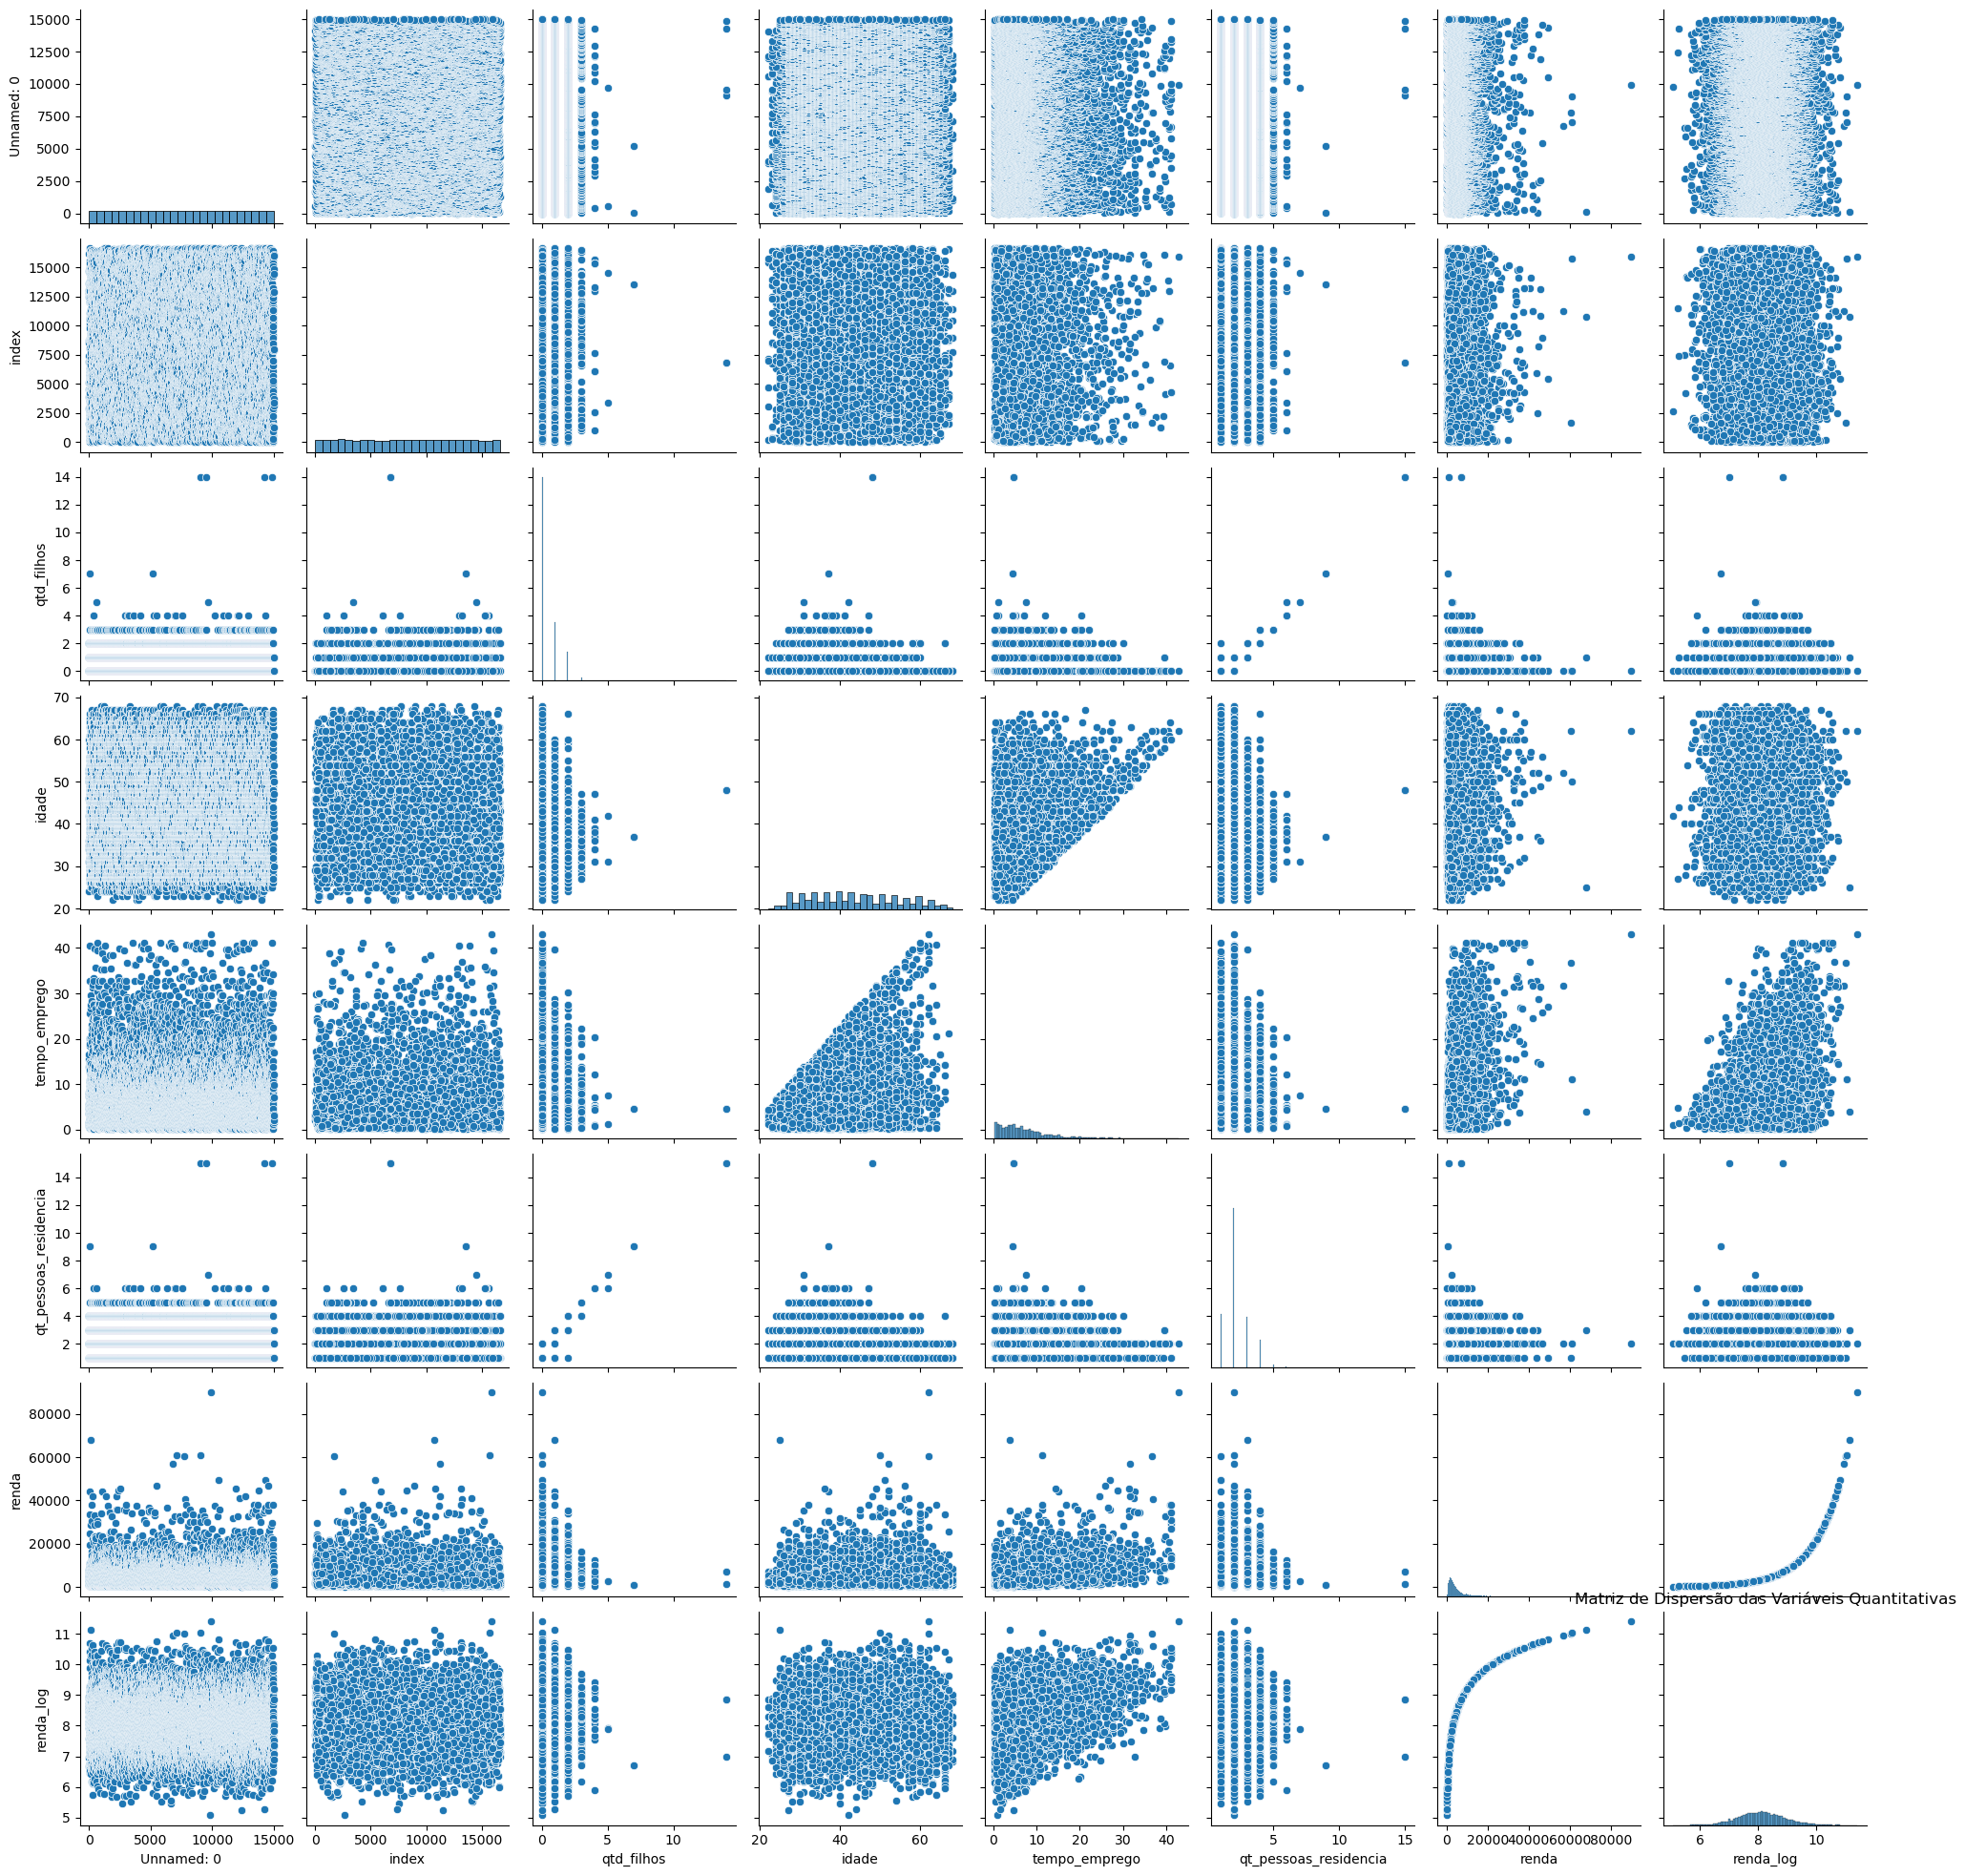

In [28]:
# Filtrar apenas as variáveis quantitativas 
quantitative_vars = df.select_dtypes(include=['float64', 'int64']) 
# Mostrar a matriz de correlação 
correlation_matrix = quantitative_vars.corr() 
# Plotar a matriz de correlação 
plt.figure(figsize=(10,8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Matriz de Correlação das Variáveis Quantitativas') 
plt.show() 
# Plotar a matriz de dispersão 
sns.pairplot(quantitative_vars) 
plt.title('Matriz de Dispersão das Variáveis Quantitativas') 
plt.show()

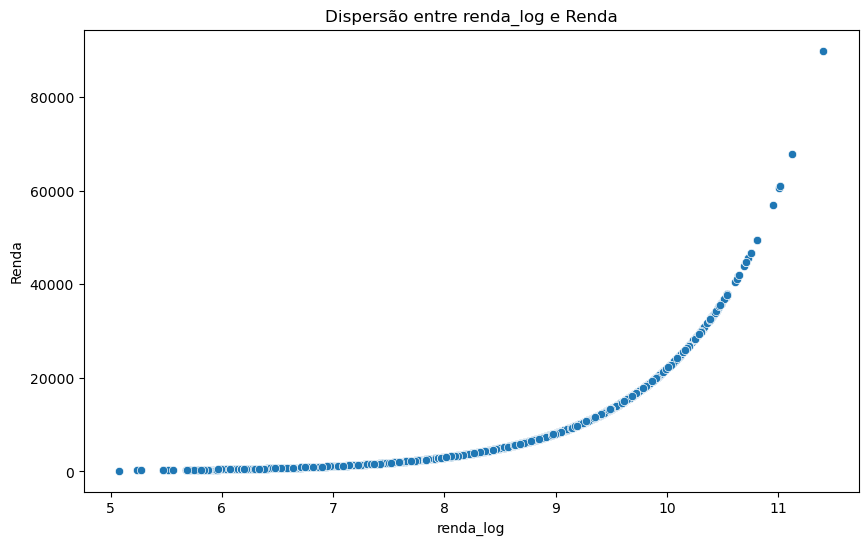

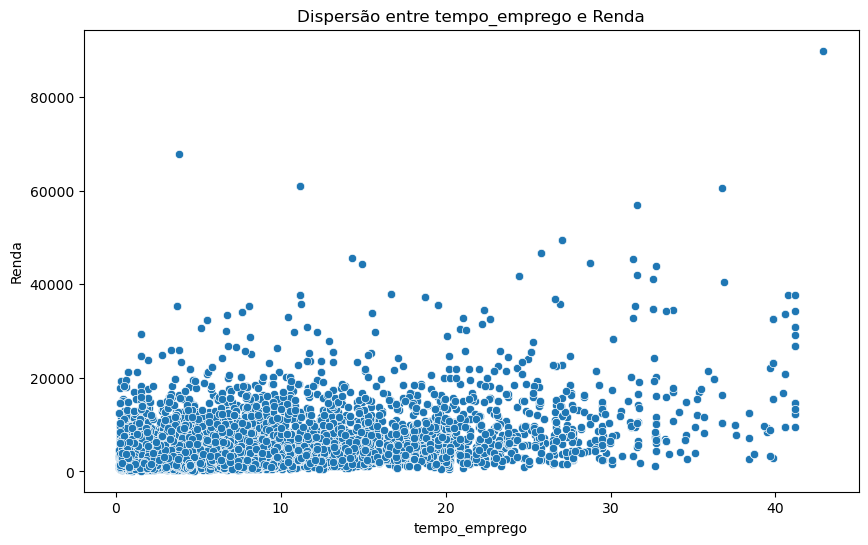

In [29]:
# Ordenar as correlações com a variável 'renda' em ordem decrescente 
correlations_with_renda = correlation_matrix['renda'].sort_values(ascending=False) 
# Selecionar as duas variáveis mais correlacionadas com 'renda' (exceto a própria 'renda') 
top_correlated_vars = correlations_with_renda.index[1:3]
# Plotar o gráfico de dispersão para as duas variáveis mais correlacionadas com 'renda' 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df, x=top_correlated_vars[0], y='renda') 
plt.title(f'Dispersão entre {top_correlated_vars[0]} e Renda') 
plt.xlabel(top_correlated_vars[0]) 
plt.ylabel('Renda') 
plt.show() 

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df, x=top_correlated_vars[1], y='renda') 
plt.title(f'Dispersão entre {top_correlated_vars[1]} e Renda') 
plt.xlabel(top_correlated_vars[1]) 
plt.ylabel('Renda') 

plt.show()

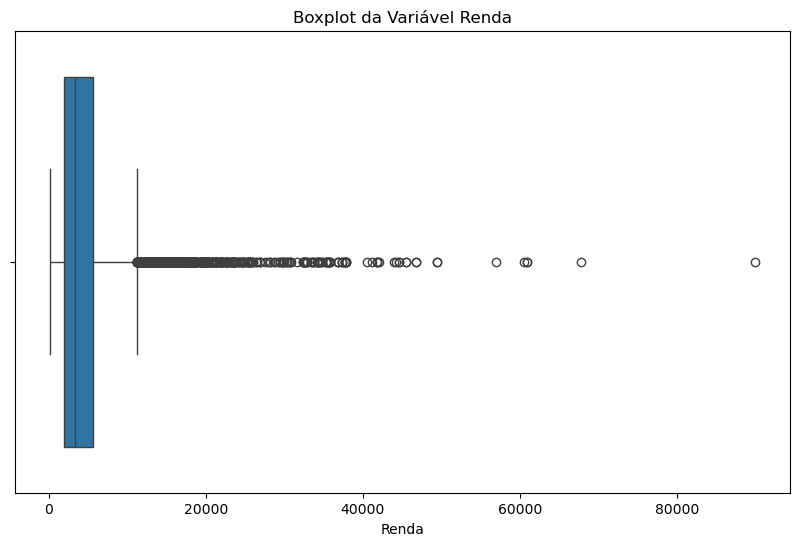

In [30]:
# Plotar o boxplot para a variável 'renda' 
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['renda']) 
plt.title('Boxplot da Variável Renda') 
plt.xlabel('Renda') 
plt.show()

Sim, temos outliers na variavel renda, O boxplot mostra que a maioria dos dados de renda esta na parte inferior da escala, indicando que a maioria dos clientes tem uma renda mais baixa. Mas identificamos a presença de outliers, que são valores de renda significativamente maiores do que a maioria dos dado.

In [31]:
# Calcular o logaritmo da variável 'renda' 
df['renda_log'] = np.log(df['renda']) 
# Mostrar as primeiras linhas do dataframe para verificar a nova coluna 
print(df[['renda', 'renda_log']].head())

     renda  renda_log
0  3369.24   8.122442
1  6096.14   8.715411
2  5658.98   8.640999
3  7246.69   8.888300
4  4017.37   8.298383


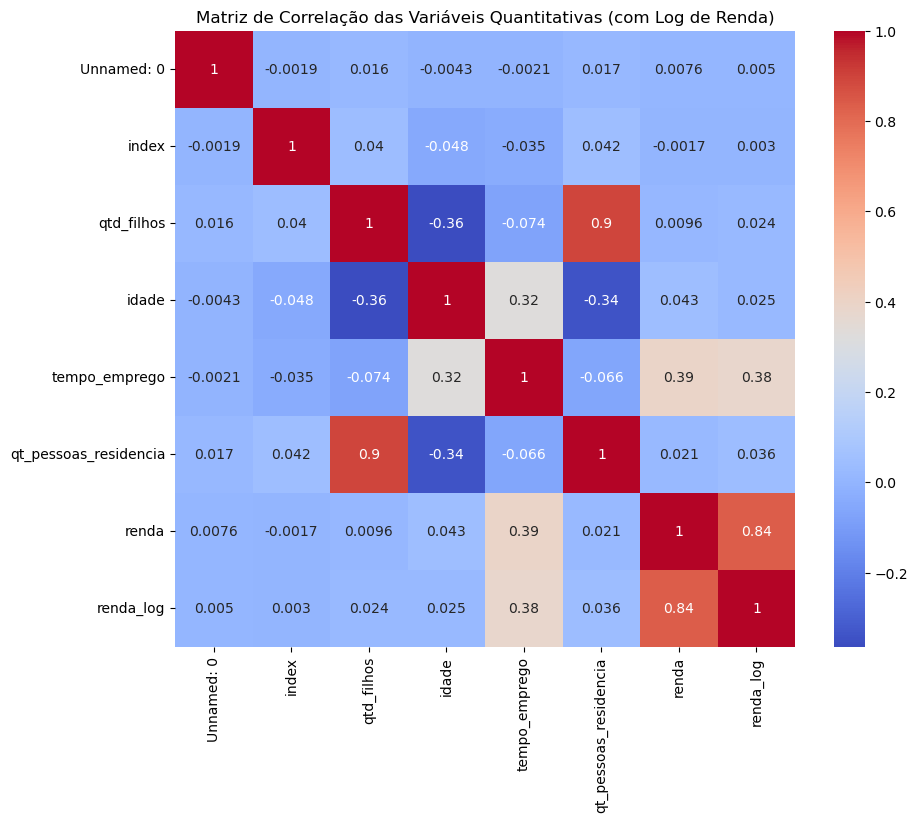

In [32]:
# Filtrar apenas as variáveis quantitativas, incluindo 'renda_log' 
quantitative_vars = df.select_dtypes(include=['float64', 'int64']) 
# Mostrar a matriz de correlação 
correlation_matrix = quantitative_vars.corr() 
# Plotar a matriz de correlação 
plt.figure(figsize=(10,8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Matriz de Correlação das Variáveis Quantitativas (com Log de Renda)') 
plt.show()

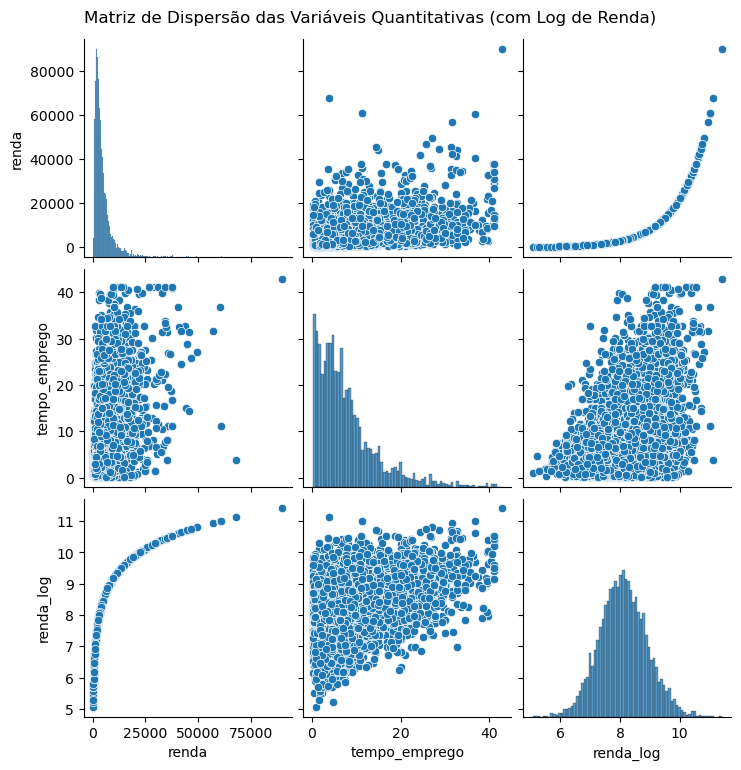

In [33]:
# Identificar as duas variáveis mais correlacionadas com 'renda_log' 
correlations_with_renda_log = correlation_matrix['renda_log'].sort_values(ascending=False) 
top_correlated_vars_log = correlations_with_renda_log.index[1:3]
# Plotar a matriz de dispersão para as duas variáveis mais correlacionadas com 'renda_log' 
sns.pairplot(df, vars=[top_correlated_vars_log[0], top_correlated_vars_log[1], 'renda_log']) 
plt.suptitle('Matriz de Dispersão das Variáveis Quantitativas (com Log de Renda)', y=1.02) 
plt.show()

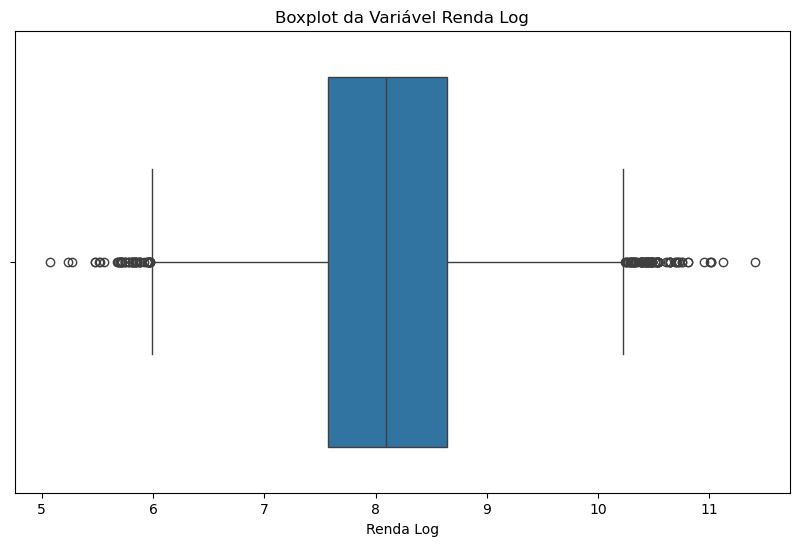

In [34]:
# Plotar o boxplot para a variável 'renda_log'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['renda_log']) 
plt.title('Boxplot da Variável Renda Log')
plt.xlabel('Renda Log')
plt.show()

A aplicação do logaritmo melhorou a análise ao normalizar a distribuição da variável "renda" e reduzir a influência dos outliers. Isso facilita a visualização das relações entre as variáveis e pode melhorar a eficácia dos modelos.